In [1]:
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()

In [3]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [4]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

Buscamos modelo predictivo para nuestra columna "Target"

In [5]:
df_train = df.copy()
df_train.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
6324,6325,34,blue-collar,soltero,secundaria/superiores,no,-317,si,no,movil,518,17-apr-2021,3,346,1,otro,no
36848,36849,47,management,divorciado,universitarios,no,140,no,si,movil,148,20-nov-2021,2,-1,0,Sin Información,no
41527,41528,46,management,casado,secundaria/superiores,no,700,no,si,movil,136,7-jul-2021,1,-1,0,Sin Información,no


In [6]:
df_train.loc[df_train['target'] == 'no', 'target'] = 0
df_train.loc[df_train['target'] == 'si', 'target'] = 1
df_train['target'] = df_train['target'].astype(int)

In [7]:
df_train.sample(30)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
34558,34559,31,management,casado,universitarios,no,4945,no,no,movil,445,11-aug-2021,1,-1,0,Sin Información,0
29809,29810,26,technician,soltero,secundaria/superiores,no,455,no,no,movil,240,29-jan-2021,1,182,8,otro,0
17920,17921,39,entrepreneur,casado,universitarios,no,3,no,no,Sin Información,12,20-jun-2021,14,-1,0,Sin Información,0
16955,16956,57,retired,casado,secundaria/superiores,si,32,si,no,movil,476,15-may-2021,3,-1,0,Sin Información,0
31073,31074,42,management,casado,universitarios,no,0,si,no,movil,177,18-jul-2021,5,-1,0,Sin Información,0
25583,25584,35,management,casado,secundaria/superiores,no,1,si,no,Sin Información,246,29-may-2021,2,-1,0,Sin Información,0
43475,43476,29,housemaid,casado,priamaria,no,417,no,no,movil,108,23-jul-2021,2,-1,0,Sin Información,0
4086,4087,49,management,casado,universitarios,no,0,no,no,fijo,223,17-oct-2021,1,-1,0,Sin Información,1
43340,43341,58,blue-collar,casado,secundaria/superiores,no,556,no,si,fijo,229,10-jul-2021,4,-1,0,Sin Información,0
20886,20887,54,blue-collar,casado,priamaria,no,-219,si,no,Sin Información,276,15-may-2021,4,-1,0,Sin Información,0


In [8]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
priamaria                 6708
Name: count, dtype: int64


In [9]:
# Reemplaza el valor erróneo en la columna 'educacion'
df_train['educacion'] = df_train['educacion'].replace('priamaria', 'primaria')


In [10]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
primaria                  6708
Name: count, dtype: int64


In [11]:
columns_to_delete = ['fecha_contacto', 'ID']
df_train.drop(columns=columns_to_delete,inplace=True)

df_train.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
10288,38,technician,soltero,secundaria/superiores,no,294,no,si,movil,172,2,-1,0,Sin Información,0
39254,37,blue-collar,casado,priamaria,no,5052,si,no,Sin Información,37,3,-1,0,Sin Información,0
5489,55,technician,divorciado,universitarios,no,264,si,no,Sin Información,34,2,-1,0,Sin Información,0


In [12]:

#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])
a=onehot.transform(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(42446, 38)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,target,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,...,vivienda_si,prestamo_no,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito
17258,38,-478,154,1,-1,0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
20405,34,0,201,6,-1,0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3655,60,30,629,4,-1,0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
27718,41,442,344,2,-1,0,0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
24817,27,979,272,4,357,1,0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
X = df_train.drop(columns=["target"],inplace=False)
y = df_train["target"]

print("Tamaño X",X.shape)
print("Tamaño y",y.shape)

Tamaño X (42446, 37)
Tamaño y (42446,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
print("Tamaño X_train",X_train.shape)
print("Tamaño y_train",y_train.shape)
print("Tamaño X_test",X_test.shape)
print("Tamaño y_test",y_test.shape)

Tamaño X_train (31834, 37)
Tamaño y_train (31834,)
Tamaño X_test (10612, 37)
Tamaño y_test (10612,)


In [16]:
# Suponiendo que X es tu conjunto de características y y es tu variable objetivo
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]
y_pred_dicotomico = (y_pred > 0.5) *1
print(y_pred_dicotomico)


[1 0 0 ... 1 0 0]


e:\ANACONDA\envs\caso_practico_1\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
accuracy = accuracy_score(y_test, y_pred_dicotomico)
print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.895778364116095


In [18]:
# Estandarización controlada

estandarizador = StandardScaler()
estandarizador.fit(X_train)

X_train_std=estandarizador.transform(X_train)
X_test_std=estandarizador.transform(X_test)

In [19]:
# Suponiendo que X es tu conjunto de características y y es tu variable objetivo
model_std = LogisticRegression()
model_std.fit(X_train_std, y_train)
y_pred_std = model.predict_proba(X_test_std)[:,1]
y_pred_std_dicotomico = (y_pred_dicotomico > 0.5) *1

accuracy = accuracy_score(y_test, y_pred_std_dicotomico)
print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.895778364116095


e:\ANACONDA\envs\caso_practico_1\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [20]:
# 'model' es tu modelo entrenado DecisionTreeClassifier y 'df_train' es tu DataFrame original con las características de entrenamiento
# Selecciona todas las características (X) de tu DataFrame original 'df_train'
X_base_datos = df_train.drop('target', axis=1, inplace=False)  # Asegúrate de excluir la columna de la variable objetivo si está presente

X_base_datos_std=estandarizador.fit_transform(X_base_datos)


# Realiza la predicción utilizando el modelo entrenado
model_std.fit(X_base_datos_std,y)
y_pred_base_datos = model_std.predict_proba(X_base_datos_std)

# Ahora 'y_pred_base_datos' contiene las predicciones para toda tu base de datos
# utilizaremos la predicion de todo el df y lo agregamos en una nueva columna para comprar valores reales a los predichos

df['target_predicho'] = y_pred_base_datos[:,1]
df['target_predicho_dic'] = df['target_predicho'] > 0.5

df.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho,target_predicho_dic
9939,9940,33,services,soltero,universitarios,no,1268,si,no,movil,451,6-may-2021,1,350,1,otro,no,0.270535,False
3004,3005,64,retired,casado,universitarios,no,846,no,no,movil,107,14-aug-2021,3,-1,0,Sin Información,no,0.121399,False
3212,3213,55,management,divorciado,universitarios,no,277,no,no,movil,101,12-aug-2021,3,-1,0,Sin Información,no,0.076738,False


In [21]:
df.sample(10)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho,target_predicho_dic
14355,14356,43,management,casado,universitarios,no,348,no,si,movil,88,15-jul-2021,3,-1,0,Sin Información,no,0.035907,False
30650,30651,31,blue-collar,casado,primaria,no,0,no,no,Sin Información,10,16-jun-2021,5,-1,0,Sin Información,no,0.007163,False
26650,26651,57,retired,casado,secundaria/superiores,no,91,no,si,Sin Información,256,3-jul-2021,3,-1,0,Sin Información,no,0.034847,False
22079,22080,37,admin.,soltero,universitarios,no,1000,si,no,movil,322,15-jun-2021,1,90,1,exito,si,0.704761,True
6148,6149,40,blue-collar,casado,secundaria/superiores,no,-648,si,no,movil,280,21-nov-2021,2,-1,0,Sin Información,no,0.047200,False
17723,17724,60,blue-collar,casado,primaria,no,38,si,no,movil,109,15-may-2021,11,373,1,otro,no,0.013994,False
26837,26838,36,technician,casado,secundaria/superiores,no,-78,si,no,movil,346,6-may-2021,1,-1,0,Sin Información,no,0.075848,False
2875,2876,45,blue-collar,casado,secundaria/superiores,no,42,si,no,Sin Información,125,19-may-2021,5,-1,0,Sin Información,no,0.006365,False
2966,2967,41,technician,casado,secundaria/superiores,no,994,no,no,movil,117,22-aug-2021,4,-1,0,Sin Información,no,0.049014,False
22610,22611,55,management,divorciado,universitarios,no,2037,no,no,movil,209,2-nov-2021,2,273,1,sin_exito,si,0.168018,False


(array([30397.,  5819.,  2015.,  1009.,   741.,   568.,   605.,   518.,
          381.,   393.]),
 array([1.68601370e-05, 1.00015167e-01, 2.00013473e-01, 3.00011780e-01,
        4.00010086e-01, 5.00008393e-01, 6.00006699e-01, 7.00005006e-01,
        8.00003312e-01, 9.00001619e-01, 9.99999925e-01]),
 <BarContainer object of 10 artists>)

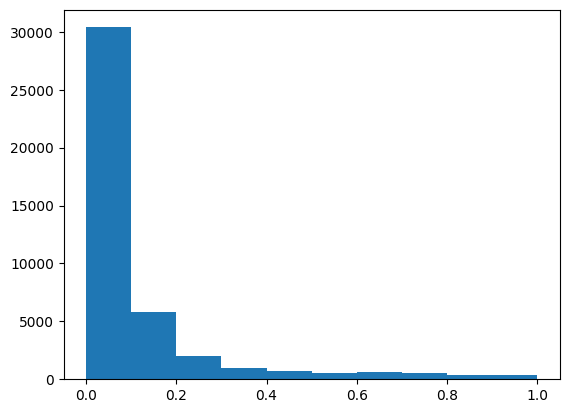

In [22]:
plt.hist(df['target_predicho'])

In [ ]:
df[['target','target_predicho','target_predicho_dic','ID']].sample(10)

,target,target_predicho,target_predicho_dic,ID
27785,no,0.053151,False,27786
28749,no,0.121945,False,28750
20009,no,0.184891,False,20010
7021,no,0.158894,False,7022
28540,si,0.704712,True,28541
9639,no,0.062379,False,9640
43015,no,0.056774,False,43016
12382,no,0.026961,False,12383
28269,no,0.009516,False,28270
29445,no,0.037178,False,29446


## MODELO PREDICTIVO CON 'DATA_TEST'

In [ ]:
og_test = pd.read_csv('Data_Test.csv', sep = ';')
df_test = og_test.copy()

In [ ]:
df_test.dropna(subset=['educacion'], inplace=True)

df_test.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [ ]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df_test[['tipo_contacto', 'resultado_campanas_anteriores']] = df_test[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df_test.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

Buscamos modelo predictivo para nuestra columna "Target"

In [ ]:
df_test_model = df_test.copy()
df_test_model.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
6324,6325,34,blue-collar,soltero,secundaria/superiores,no,-317,si,no,movil,518,17-apr-2021,3,346,1,otro,no
36848,36849,47,management,divorciado,universitarios,no,140,no,si,movil,148,20-nov-2021,2,-1,0,Sin Información,no
41527,41528,46,management,casado,secundaria/superiores,no,700,no,si,movil,136,7-jul-2021,1,-1,0,Sin Información,no


In [ ]:
df_test_model.loc[df_test_model['target'] == 'no', 'target'] = 0
df_test_model.loc[df_test_model['target'] == 'si', 'target'] = 1
df_test_model['target'] = df_test_model['target'].astype(int)

In [ ]:
df_test_model.sample(30)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
34558,34559,31,management,casado,universitarios,no,4945,no,no,movil,445,11-aug-2021,1,-1,0,Sin Información,0
29809,29810,26,technician,soltero,secundaria/superiores,no,455,no,no,movil,240,29-jan-2021,1,182,8,otro,0
17920,17921,39,entrepreneur,casado,universitarios,no,3,no,no,Sin Información,12,20-jun-2021,14,-1,0,Sin Información,0
16955,16956,57,retired,casado,secundaria/superiores,si,32,si,no,movil,476,15-may-2021,3,-1,0,Sin Información,0
31073,31074,42,management,casado,universitarios,no,0,si,no,movil,177,18-jul-2021,5,-1,0,Sin Información,0
25583,25584,35,management,casado,secundaria/superiores,no,1,si,no,Sin Información,246,29-may-2021,2,-1,0,Sin Información,0
43475,43476,29,housemaid,casado,priamaria,no,417,no,no,movil,108,23-jul-2021,2,-1,0,Sin Información,0
4086,4087,49,management,casado,universitarios,no,0,no,no,fijo,223,17-oct-2021,1,-1,0,Sin Información,1
43340,43341,58,blue-collar,casado,secundaria/superiores,no,556,no,si,fijo,229,10-jul-2021,4,-1,0,Sin Información,0
20886,20887,54,blue-collar,casado,priamaria,no,-219,si,no,Sin Información,276,15-may-2021,4,-1,0,Sin Información,0


In [ ]:
# Reemplaza el valor erróneo en la columna 'educacion'
df_test_model['educacion'] = df_test_model['educacion'].replace('priamaria', 'primaria')


In [ ]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df_test['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
primaria                  6708
Name: count, dtype: int64


In [ ]:
columns_to_delete = ['fecha_contacto', 'ID']
df_test_model.drop(columns=columns_to_delete,inplace=True)

df_test_model.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
10288,38,technician,soltero,secundaria/superiores,no,294,no,si,movil,172,2,-1,0,Sin Información,0
39254,37,blue-collar,casado,priamaria,no,5052,si,no,Sin Información,37,3,-1,0,Sin Información,0
5489,55,technician,divorciado,universitarios,no,264,si,no,Sin Información,34,2,-1,0,Sin Información,0


In [ ]:

#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_test_model[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])
a=onehot.transform(df_test_model[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_test_model.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_test_model=pd.concat([df_test_model,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_test_model.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_test_model.shape)
df_test_model.sample(5)

(42446, 38)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,target,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,...,vivienda_si,prestamo_no,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito
17258,38,-478,154,1,-1,0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
20405,34,0,201,6,-1,0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3655,60,30,629,4,-1,0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
27718,41,442,344,2,-1,0,0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
24817,27,979,272,4,357,1,0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


* falta cambiar las celdas de abajo

In [ ]:
y_pred_base_datos = model_std.predict_proba(X_base_datos_std)

# Ahora 'y_pred_base_datos' contiene las predicciones para toda tu base de datos
# utilizaremos la predicion de todo el df y lo agregamos en una nueva columna para comprar valores reales a los predichos

df_test['target_predicho'] = y_pred_base_datos[:,1]
df_test['target_predicho_dic'] = df['target_predicho'] > 0.5

df_test.sample(3)

In [ ]:
df_test[['target','target_predicho','target_predicho_dic','ID']].sample(10)